In [1]:
# Created by: Michael Cullen
# 08/10/2024

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Average-prices-2024-06.csv', header=0)  # Header=0 to use the first row as column names

print(df.head())  # Display the first few rows to verify
print(df.columns)  # Display column names

         Date       Region_Name  Area_Code  Average_Price  Monthly_Change  \
0  1968-04-01  Northern Ireland  N92000001    3661.485500             0.0   
1  1968-04-01           England  E92000001    3408.108064             0.0   
2  1968-04-01             Wales  W92000004    2885.414162             0.0   
3  1968-04-01          Scotland  S92000003    2844.980688             0.0   
4  1968-04-01            London  E12000007    4418.489911             0.0   

   Annual_Change  Average_Price_SA  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN  
Index(['Date', 'Region_Name', 'Area_Code', 'Average_Price', 'Monthly_Change',
       'Annual_Change', 'Average_Price_SA'],
      dtype='object')


In [4]:
area_set = {i for i in df['Region_Name']}


dropdown = widgets.Dropdown(
    options=sorted(area_set),
    description='Area:',
    disabled=False,
)

# below code created by chatgbt

# Define a function to filter the DataFrame based on dropdown selection
def filter_data(change):
    global area_of_interest
    global df_area  # Define df_area as a global variable
    area_of_interest = change['new']
    if area_of_interest:  # If a selection is made
        df_area = df[df['Region_Name'] == area_of_interest]
        display(df_area)

# Observe dropdown changes
dropdown.observe(filter_data, names='value')

# above code created by chatgbt

display(dropdown)

Dropdown(description='Area:', options=('Aberdeenshire', 'Adur', 'Amber Valley', 'Angus', 'Antrim and Newtownab…

,Date,Region_Name,Area_Code,Average_Price,Monthly_Change,Annual_Change,Average_Price_SA
3372,1995-01-01,City of London,E09000001,91448.98487,NaN,NaN,NaN
3742,1995-02-01,City of London,E09000001,82202.77314,-10.110787,NaN,NaN
4093,1995-03-01,City of London,E09000001,79120.70256,-3.749351,NaN,NaN
4440,1995-04-01,City of London,E09000001,77101.20804,-2.552422,NaN,NaN
4816,1995-05-01,City of London,E09000001,84409.14932,9.478375,NaN,NaN
...,...,...,...,...,...,...,...
139844,2024-02-01,City of London,E09000001,849938.00000,2.500000,4.8,NaN
140271,2024-03-01,City of London,E09000001,826707.00000,-2.700000,-4.9,NaN
140670,2024-04-01,City of London,E09000001,810829.00000,-1.900000,-5.6,NaN
141059,2024-05-01,City of London,E09000001,829091.00000,2.300000,-14.4,NaN


C:\Users\mjcul\AppData\Local\Temp\ipykernel_11304\2191613081.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Date'] = pd.to_datetime(df_area['Date'])
C:\Users\mjcul\AppData\Local\Temp\ipykernel_11304\2191613081.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Years'] = pd.DatetimeIndex(df_area['Date']).year


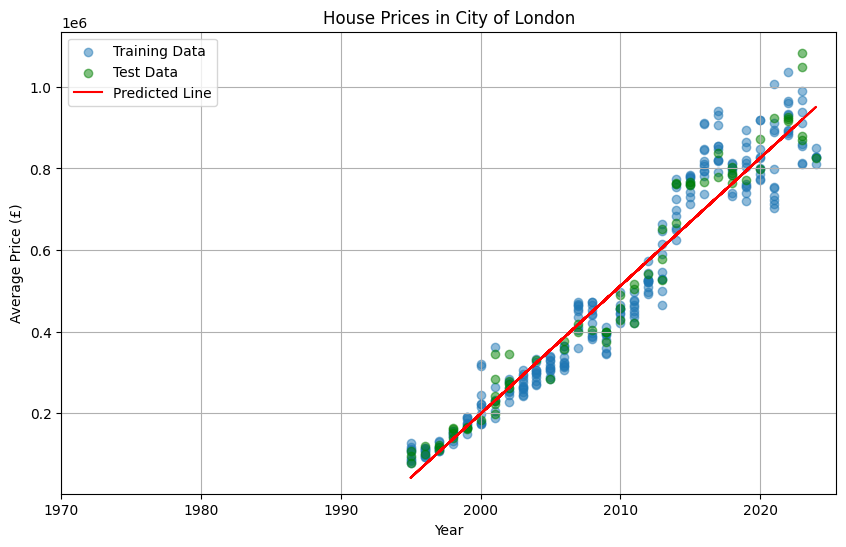

In [5]:
if 'df_area' not in globals() or df_area.empty:
    print(f"No data found for region: {area_of_interest}")
else:
    # Convert 'Date' column to datetime format
    df_area['Date'] = pd.to_datetime(df_area['Date'])
    df_area['Years'] = pd.DatetimeIndex(df_area['Date']).year

    # Use all samples in df_area
    df_area_sampled = df_area.iloc[::1]

    # Define features (X) and target variable (y)
    X = df_area_sampled[['Years']]
    y = df_area_sampled['Average_Price']

    # Split the data (to ensure consistency)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on X_test
    y_pred = model.predict(X_test)

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, label="Training Data")
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label="Test Data")
    plt.plot(X_test, y_pred, color='red', label="Predicted Line")
    
    plt.xlabel('Year')
    plt.ylabel('Average Price (£)')
    plt.title(f'House Prices in {area_of_interest}')
    plt.xlim(1970)
    plt.ylim(3000)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Display model parameters
print("Model slope:    ", model.coef_[0])

Mean Squared Error: 3703735993.97
R² Score: 0.96
Model slope:     31325.52359963256
